# 프로젝트 가이드라인


***※ 딥러닝 강의에서 배운 모델 (CNN, RNN, LSTM, GRU, Autoencoder, GAN) 을 기본 모델로 사용합니다.***

***그외 모델을 추가로 사용해서 제출하시는 것은 자유이나, 평가는 딥러닝 과정에서 배운 기본 모델 기준으로 평가합니다.***

## 1. 모델링의 목적 설명
## 2. 모델 설명 및 선정 이유
## 3. 데이터셋 처리 과정, 모델링 과정 코드 리뷰
## 4. 결과 (성능 평가 결과, 인사이트, 한계점&보완할 점 등)
### 발표는 ipynb노트북 기준으로 진행. ppt slide 제작은 자유.


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
%cd /content/gdrive/MyDrive/빅데이터 7기/Deep_Learning/KDT_DeepLearning_Day5

/content/gdrive/MyDrive/빅데이터 7기/Deep_Learning/KDT_DeepLearning_Day5


In [10]:
%cd noise_documents

/content/gdrive/MyDrive/빅데이터 7기/Deep_Learning/KDT_DeepLearning_Day5/noise_documents


In [11]:
!ls

sampleSubmission.csv  test  train  train_cleaned


## kaggle 'Denoising Dirty Document' 데이터 활용하여 Autoencoder 구현
---

![Denoising Dirty Document](https://drive.google.com/uc?export=view&id=1YTwcBenw_niwk7Xs7lvk6U0zdTRTNuvu)


- train : 노이즈가 포함된 입력 데이터 -> 입력 층
- train_cleaned : 노이즈가 없는 입력 데이터 -> 출력 층에서 train의 타겟 역
- test : 노이즈가 포함된 모델이 노이즈를 잘 제거하는지를 확인하기 위한 데이터

![Denoising Dirty Document](https://drive.google.com/uc?export=view&id=1ypDkrBFdxCw3NG9_inE7dfC8huq84mfZ)

![Denoising Dirty Document](https://drive.google.com/uc?export=view&id=1dPmULSAzWKw1qaRXFJChlY6iJ0ZcuPpb)

## 1. 이미지 데이터 불러오기

In [12]:
# 이미지 파일 불러오기
import os
import cv2

path = '/content/gdrive/MyDrive/빅데이터 7기/Deep_Learning/KDT_DeepLearning_Day5/noise_documents/'

train_img = sorted(os.listdir(path + 'train'))  # 144장
train_cleaned_img = sorted(os.listdir(path + 'train_cleaned'))  # 144장
test_img = sorted(os.listdir(path + 'test'))  # 72장

In [ ]:
# directory = "C:/Users/BIG3-012/Desktop/빅데이터 7기/딥러닝 이해와 실습/noise_documents"

In [ ]:
len(train_img), len(train_cleaned_img), len(test_img)

(144, 144, 72)

In [ ]:
train_img

['101.png',
 '102.png',
 '104.png',
 '105.png',
 '107.png',
 '108.png',
 '11.png',
 '110.png',
 '111.png',
 '113.png',
 '114.png',
 '116.png',
 '117.png',
 '119.png',
 '12.png',
 '120.png',
 '122.png',
 '123.png',
 '125.png',
 '126.png',
 '128.png',
 '129.png',
 '131.png',
 '132.png',
 '134.png',
 '135.png',
 '137.png',
 '138.png',
 '14.png',
 '140.png',
 '141.png',
 '143.png',
 '144.png',
 '146.png',
 '147.png',
 '149.png',
 '15.png',
 '150.png',
 '152.png',
 '153.png',
 '155.png',
 '156.png',
 '158.png',
 '159.png',
 '161.png',
 '162.png',
 '164.png',
 '165.png',
 '167.png',
 '168.png',
 '17.png',
 '170.png',
 '171.png',
 '173.png',
 '174.png',
 '176.png',
 '177.png',
 '179.png',
 '18.png',
 '180.png',
 '182.png',
 '183.png',
 '185.png',
 '186.png',
 '188.png',
 '189.png',
 '191.png',
 '192.png',
 '194.png',
 '195.png',
 '197.png',
 '198.png',
 '2.png',
 '20.png',
 '200.png',
 '201.png',
 '203.png',
 '204.png',
 '206.png',
 '207.png',
 '209.png',
 '21.png',
 '210.png',
 '212.png',
 '

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def process_image(path):
  img = cv2.imread(path)
  img = np.asarray(img, dtype="float32")  # dtype을 실수형으로 설정하며, 리스트를 NumPy 배열로 변환
  # img = cv2.resize(img, (540, 420))
  img = cv2.resize(img, (270, 210))  # 원래 크기의 절반으로 이미지 크기 조정
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 그레이스케일(색상 정보 대신 밝기 정보만 포함하는 2차원 배열) 이미지로 변환
  img = img/255.0  # 이미지 정규화
  # img = np.reshape(img, (420, 540, 1))  # 2차원 그레이스케일 이미지를 3차원 형태로 변경 (높이, 너비, 채널)
  img = np.reshape(img, (210, 270, 1))  # 모델에 입력하기 위해 차원 재조정

  return img

In [ ]:
process_image(path + 'train/' + '2.png').shape

(210, 270, 1)

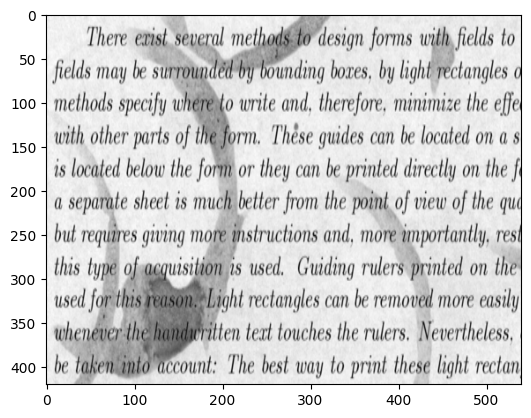

In [ ]:
# 이미지 크기가 (420, 540)일때

plt.imshow(process_image(path + 'train/' + '2.png').squeeze(), cmap='gray')
# plt.imshow(process_image(path + 'train/' + '2.png')[:, :, 0], cmap='gray')

# squeeze() : 이미지의 채널 차원을 제거하는데 사용. 그레이스케일 이미지는 채널이 필요하지 않기 때문에 squeeze()함수를 사용하여 2차원 배열로 반환
# cmap='gray' : matplotlib에게 해당 이미지를 그레이스케일 색상맵을 사용하여 표시하도록 지시

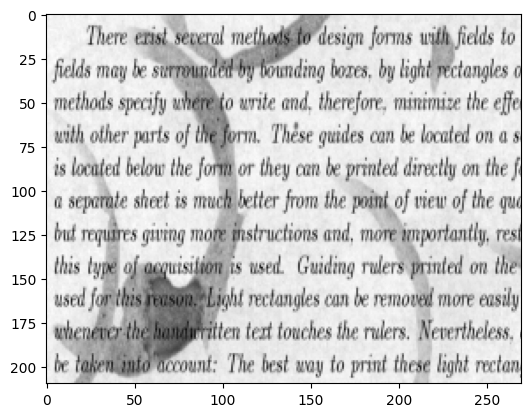

In [ ]:
# 이미지 크기가 (210, 270)일때

plt.imshow(process_image(path + 'train/' + '2.png').squeeze(), cmap='gray')
# plt.imshow(process_image(path + 'train/' + '2.png')[:, :, 0], cmap='gray')

# squeeze() : 이미지의 채널 차원을 제거하는데 사용. 그레이스케일 이미지는 채널이 필요하지 않기 때문에 squeeze()함수를 사용하여 2차원 배열로 반환
# cmap='gray' : matplotlib에게 해당 이미지를 그레이스케일 색상맵을 사용하여 표시하도록 지시

In [14]:
train = []
train_cleaned = []
test = []

for f in train_img:
  train.append(process_image(path + 'train/' + f))

for f in train_cleaned_img:
  train_cleaned.append(process_image(path + 'train_cleaned/' + f))

for f in test_img:
  test.append(process_image(path + 'test/' + f))

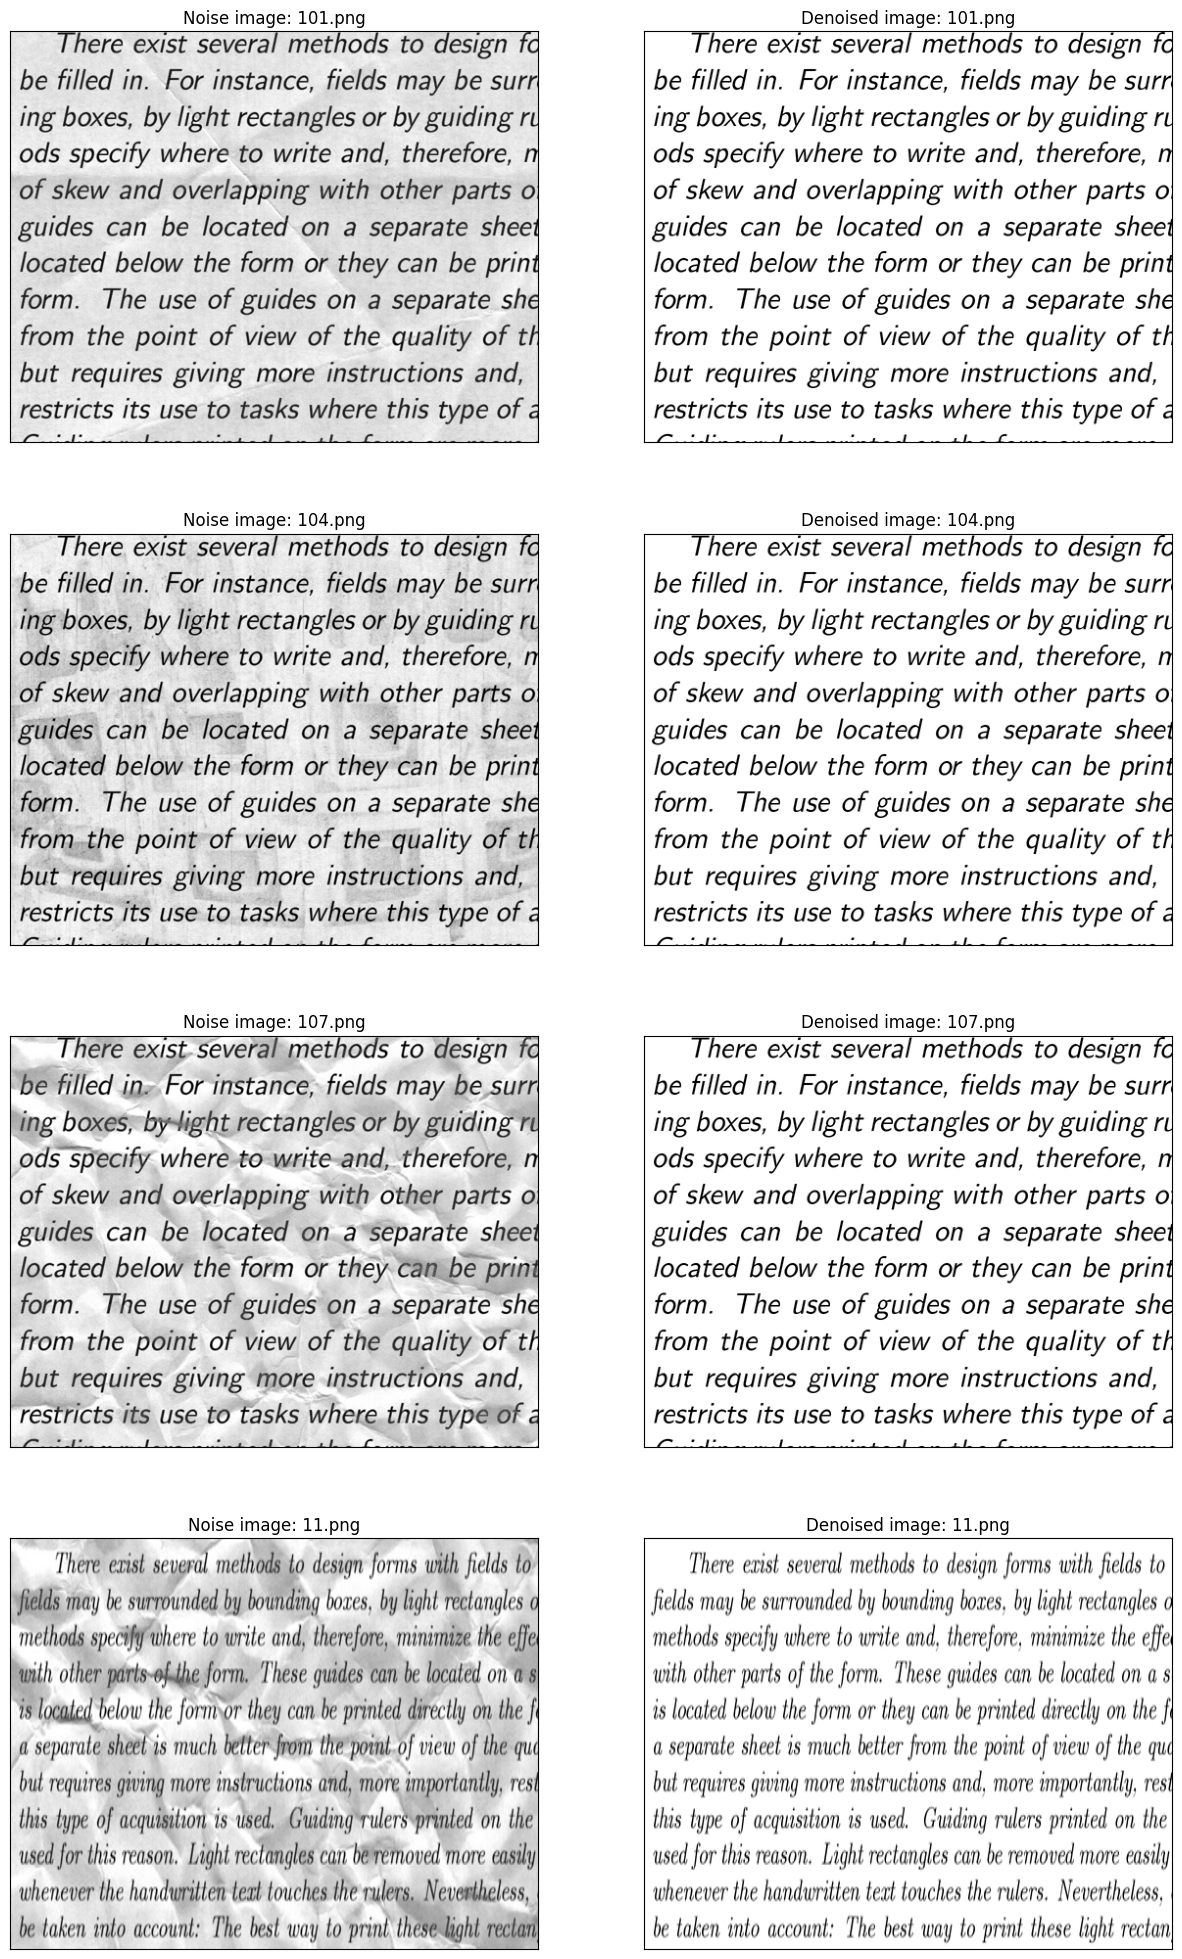

In [ ]:
# 이미지 크기가 (420, 540)일때

plt.figure(figsize=(15, 25))
for i in range(0, 8, 2):
  plt.subplot(4, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train[i].squeeze(), cmap='gray')
  plt.title('Noise image: {}'.format(train_img[i]))

  plt.subplot(4, 2, i+2)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_cleaned[i].squeeze(), cmap='gray')
  plt.title('Denoised image: {}'.format(train_img[i]))

plt.show()

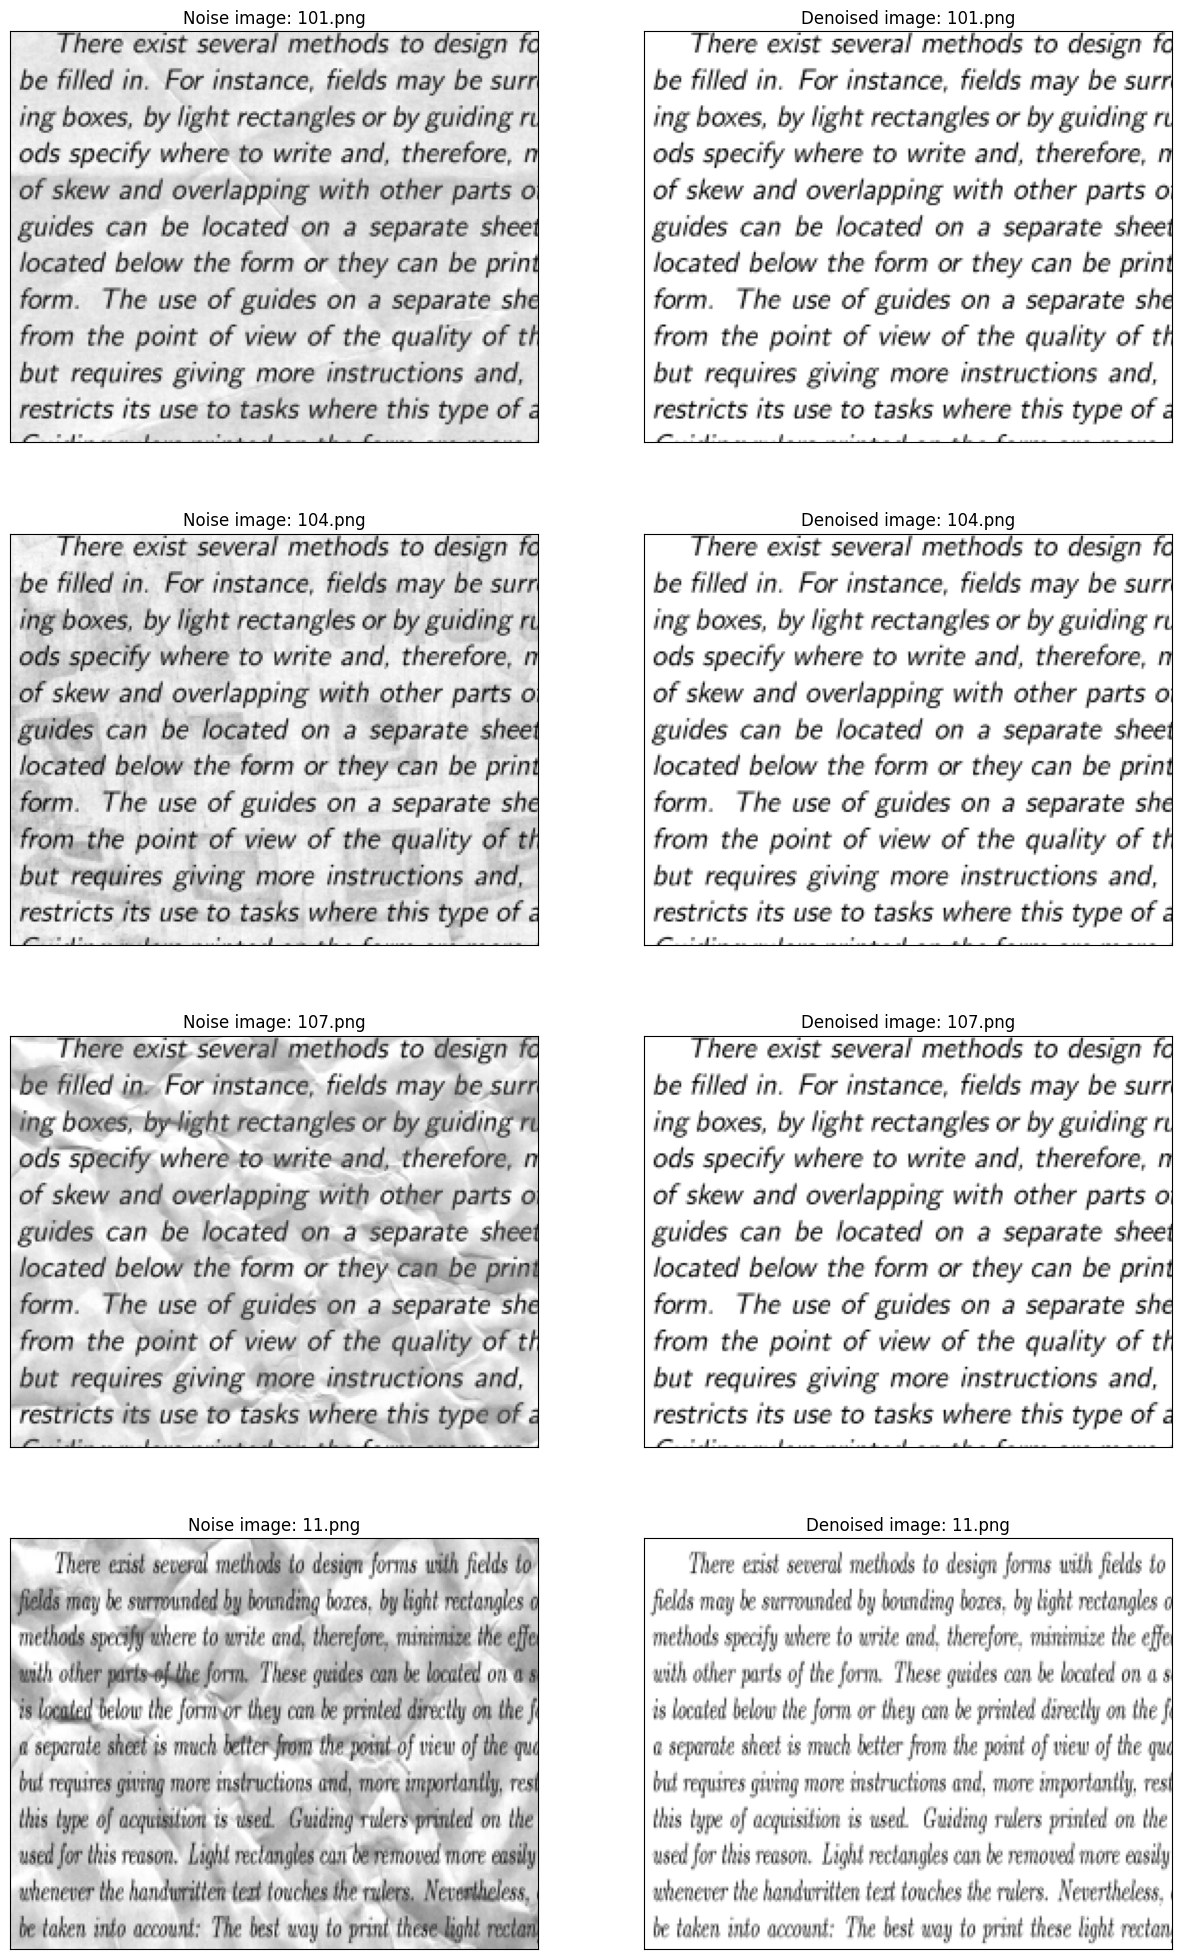

In [ ]:
# 이미지 크기가 (210, 270)일때

plt.figure(figsize=(15, 25))
for i in range(0, 8, 2):
  plt.subplot(4, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train[i].squeeze(), cmap='gray')
  plt.title('Noise image: {}'.format(train_img[i]))

  plt.subplot(4, 2, i+2)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_cleaned[i].squeeze(), cmap='gray')
  plt.title('Denoised image: {}'.format(train_img[i]))

plt.show()

## 2. train_test_split

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train = np.asarray(train)
Y_train = np.asarray(train_cleaned)
X_test = np.asarray(test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)  # 학습 데이터의 15%를 검증 데이터로 사용

In [16]:
X_train.shape

(122, 210, 270, 1)

## 3. Modeling

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

tf.keras.backend.clear_session()

In [27]:
def autoencoder():

  # 입력층
  input_shape = X_train.shape[1:]  # (420, 540, 1)
  input_layer = Input(shape=input_shape)

  # 인코딩
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  # x = MaxPooling2D((2, 2), padding='same')(x)
  x = Dropout(0.5)(x)

  # 디코딩
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  # x = UpSampling2D((2, 2))(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)

  # 출력층
  output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # 모델 생성
  autoencoder = Model(inputs=[input_layer], outputs=[output_layer])

  return autoencoder

In [28]:
model = autoencoder()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 210, 270, 1)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 210, 270, 32)      320       
                                                                 
 batch_normalization_7 (Bat  (None, 210, 270, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 105, 135, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 105, 135, 64)      18496     
                                                                 
 dropout_4 (Dropout)         (None, 105, 135, 64)      0   

In [29]:
# 모델 컴파일
model.compile(optimizer='adam' , loss='mean_squared_error', metrics=['mae'])

# 모델 학습
epochs = 10
batch_size = 16
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[callback])

Epoch 1/10
8/8 [==============================] - 44s 5s/step - loss: 0.1055 - mae: 0.2472 - val_loss: 0.1695 - val_mae: 0.3944
Epoch 2/10
8/8 [==============================] - 40s 5s/step - loss: 0.0321 - mae: 0.0937 - val_loss: 0.0979 - val_mae: 0.3008
Epoch 3/10
8/8 [==============================] - 38s 5s/step - loss: 0.0236 - mae: 0.0774 - val_loss: 0.0600 - val_mae: 0.2271
Epoch 4/10
8/8 [==============================] - 40s 5s/step - loss: 0.0193 - mae: 0.0695 - val_loss: 0.0448 - val_mae: 0.1697
Epoch 5/10
8/8 [==============================] - 41s 5s/step - loss: 0.0169 - mae: 0.0647 - val_loss: 0.0441 - val_mae: 0.1409
Epoch 6/10
8/8 [==============================] - 39s 5s/step - loss: 0.0151 - mae: 0.0605 - val_loss: 0.0472 - val_mae: 0.1258
Epoch 7/10
8/8 [==============================] - 39s 5s/step - loss: 0.0137 - mae: 0.0574 - val_loss: 0.0504 - val_mae: 0.1175
Epoch 8/10
8/8 [==============================] - 40s 5s/step - loss: 0.0127 - mae: 0.0544 - val_loss: 0

### 훈련데이터와 검증데이터의 error 그래프로 확인하기

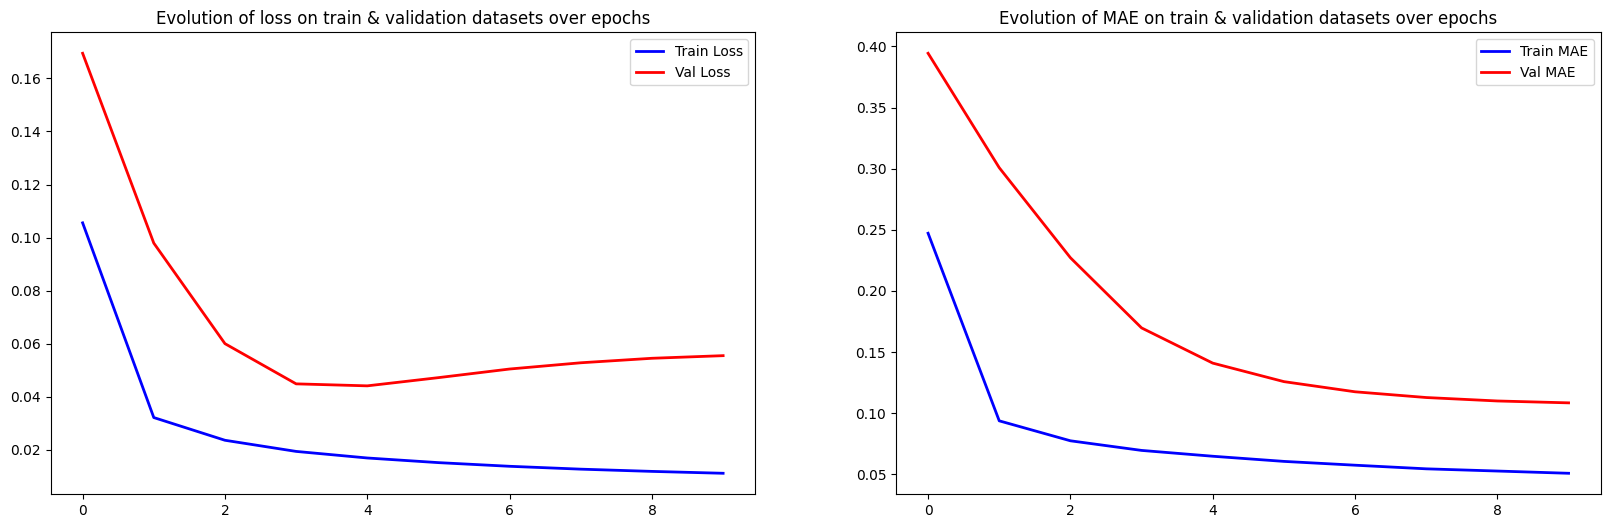

In [30]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_mae = history.history['mae']
epoch_val_mae = history.history['val_mae']

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(range(0, len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of loss on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1 ,2, 2)
plt.plot(range(0, len(epoch_mae)), epoch_mae, 'b-', linewidth=2, label='Train MAE')
plt.plot(range(0, len(epoch_val_mae)), epoch_val_mae, 'r-', linewidth=2,label='Val MAE')
plt.title('Evolution of MAE on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

## 4. Predict

In [31]:
Y_test = model.predict(X_test, batch_size=16)

5/5 [==============================] - 6s 1s/step


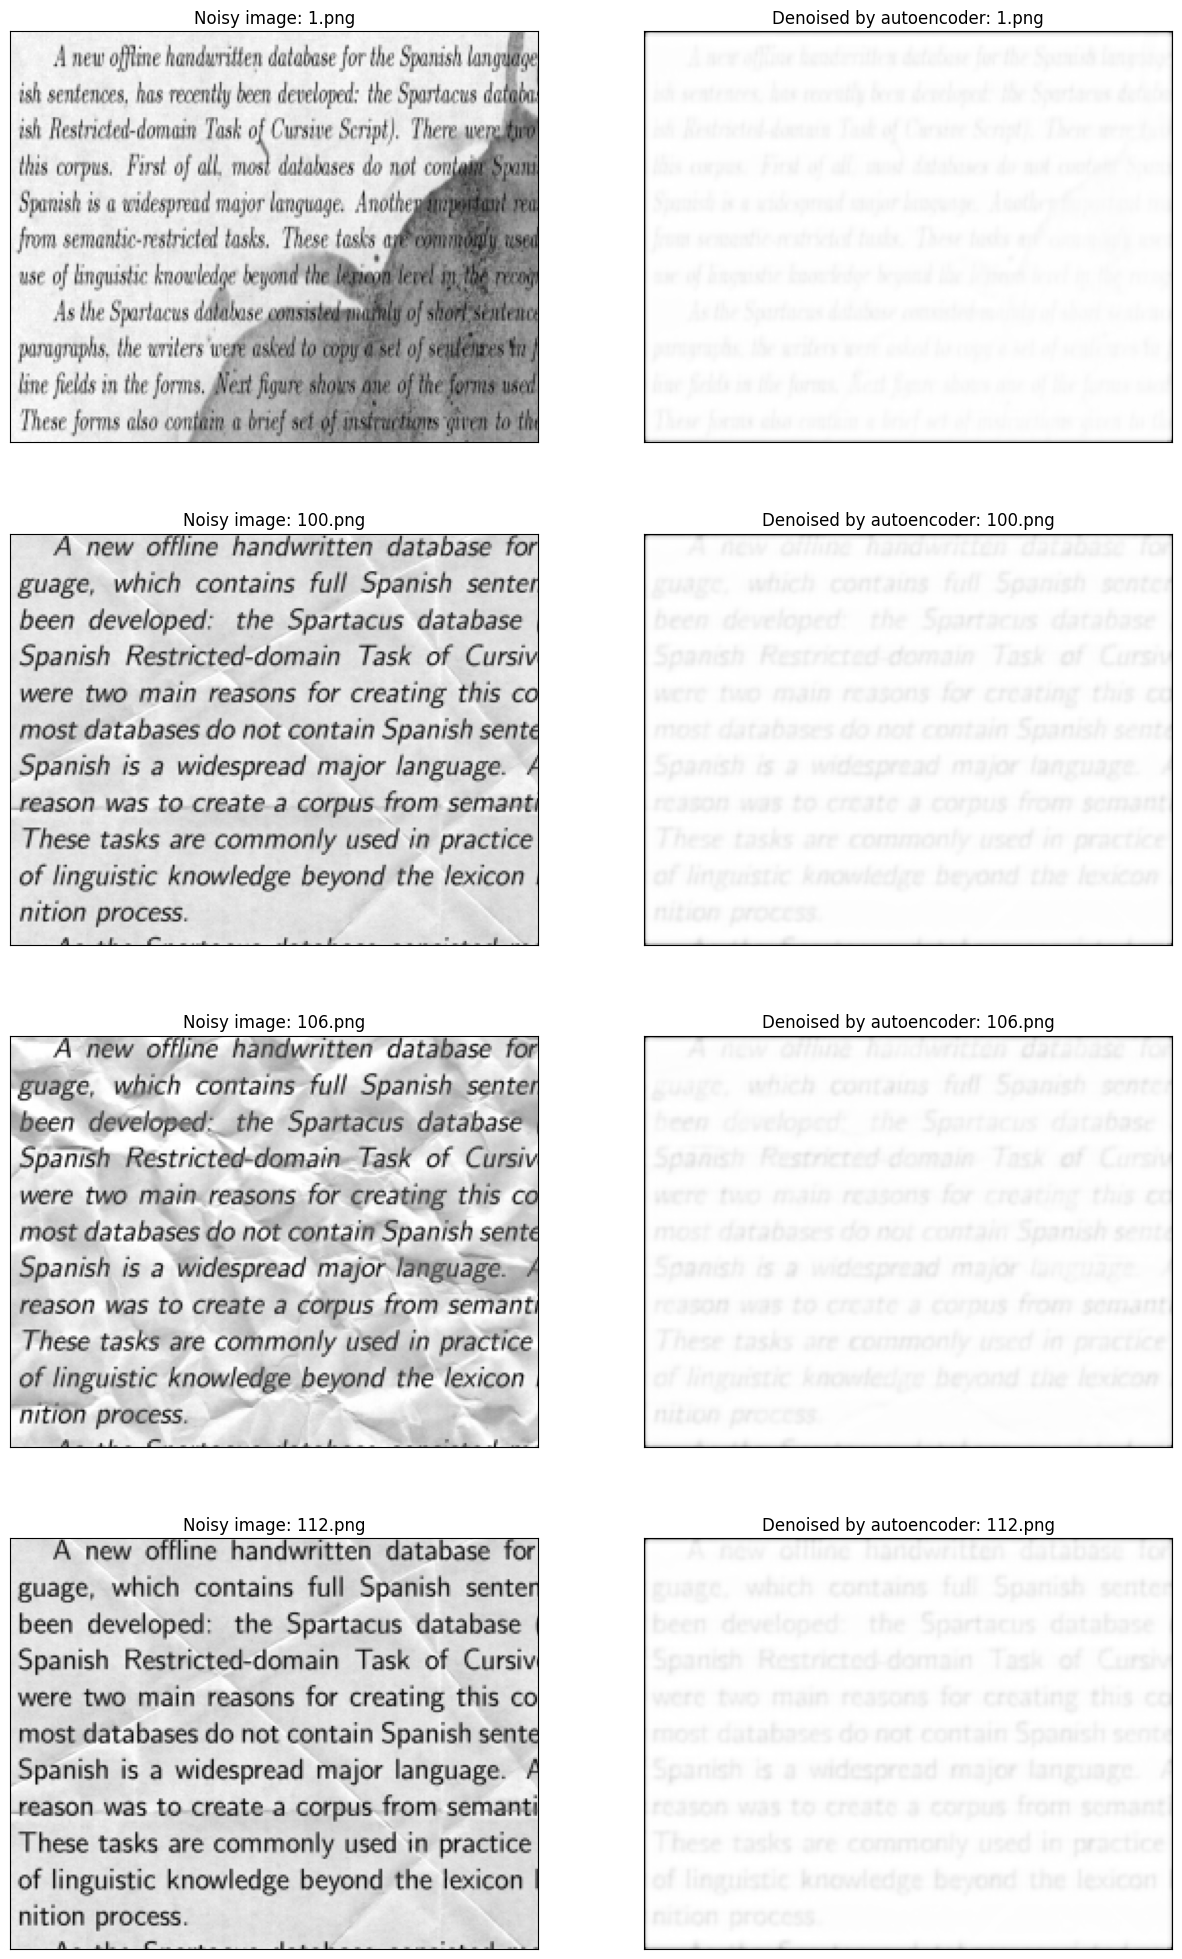

In [32]:
plt.figure(figsize=(15, 25))
for i in range(0, 8, 2):
    plt.subplot(4, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title('Noisy image: {}'.format(test_img[i]))

    plt.subplot(4, 2, i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Y_test[i].squeeze(), cmap='gray')
    plt.title('Denoised by autoencoder: {}'.format(test_img[i]))

plt.show()

In [ ]:
tf.keras.backend.clear_session()